In [10]:
import pandas as pd
import numpy as np

# import data
bank_data = pd.read_csv("data/1_american_dataset.csv")
bank_data.head()

,cik,fyear,company_name,tic,status_label,current_assets,total_assets,cost_of_goods_sold,total_long_term_debt,depreciation_and_amortization,...,total_current_liabilities,net_income,retained_earnings,total_receivables,total_revenue,market_value,total_liabilities,net_sales,total_operating_expenses,status
0,1750,1999.0,AAR CORP,AIR,alive,511.267,740.998,833.107,180.447,18.373,...,163.816,35.163,201.026,128.348,1024.333,372.7519,401.483,1024.333,935.302,0
1,1750,2000.0,AAR CORP,AIR,alive,485.856,701.854,713.811,179.987,18.577,...,125.392,18.531,204.065,115.187,874.255,377.1180,361.642,874.255,809.888,0
2,1750,2001.0,AAR CORP,AIR,alive,436.656,710.199,526.477,217.699,22.496,...,150.464,-58.939,139.603,77.528,638.721,364.5928,399.964,638.721,611.514,0
3,1750,2002.0,AAR CORP,AIR,alive,396.412,686.621,496.747,164.658,27.172,...,203.575,-12.410,124.106,66.322,606.337,143.3295,391.633,606.337,575.592,0
4,1750,2003.0,AAR CORP,AIR,alive,432.204,709.292,523.302,248.666,26.680,...,131.261,3.504,131.884,104.661,651.958,308.9071,407.608,651.958,604.467,0


## Balance data
Remove values from the majoity class (0) to be balanced with the minority (1)

In [11]:
neg, pos = np.bincount(bank_data['status'])
total = neg + pos
print('Sample distributions:\n    Total: {}\n    Not Bankrupt (0): {} ({:.2f}% of total)\n    Bankrupt (1): {} ({:.2f}% of total)'.format(
    total, neg, (100 * neg) / total, pos, (100 * pos) / total))

Sample distributions:
    Total: 78682
    Not Bankrupt (0): 73462 (93.37% of total)
    Bankrupt (1): 5220 (6.63% of total)


In [12]:
indices = bank_data[bank_data['status'] == 0].index
random_indices = np.random.choice(indices, size=neg-pos, replace=False)
bank_balanced = bank_data.drop(random_indices)

counts = bank_balanced['status'].value_counts()
print(counts)

0    5220
1    5220
Name: status, dtype: int64


## Split into training, testing, and validation sets
Save the sets to files.

In [15]:
numerical_only = bank_balanced.select_dtypes(include=['float64','int64'])
X = numerical_only.drop(['cik', 'fyear'], axis=1)
y = numerical_only['status']

X.head()

,current_assets,total_assets,cost_of_goods_sold,total_long_term_debt,depreciation_and_amortization,ebit,ebitda,gross_profit,inventory,total_current_liabilities,net_income,retained_earnings,total_receivables,total_revenue,market_value,total_liabilities,net_sales,total_operating_expenses,status
10,863.429,1501.042,1065.902,336.191,38.930,95.415,134.345,286.249,496.904,325.550,44.628,389.641,238.466,1352.151,777.8348,754.692,1352.151,1217.806,0
19,1029.438,1672.529,930.142,11.024,102.090,311.649,413.739,996.805,243.882,412.954,87.635,827.489,436.751,1926.947,7161.3749,423.978,1926.947,1513.208,0
23,1006.000,1296.900,422.600,400.000,59.200,-39.300,19.900,350.600,69.500,265.500,-76.700,-771.200,141.200,773.200,2072.9620,669.200,773.200,753.300,0
35,5.807,6.245,12.018,0.222,0.160,1.454,1.614,7.815,2.704,3.222,1.345,-8.974,2.504,19.833,13.9065,3.580,19.833,18.219,0
44,692.991,2329.268,729.995,782.249,49.681,105.547,155.228,567.290,309.277,358.271,13.833,72.500,258.471,1297.285,1045.8834,1197.279,1297.285,1142.057,0


In [16]:
from sklearn.model_selection import train_test_split

# split data into training (70%), validation (15%), and testing (15%) sets 
X_, X_test, y_, y_test = train_test_split(X, y, train_size=0.8, test_size=0.15, random_state=42, shuffle=True)
X_train, X_validate, y_train, y_validate = train_test_split(X_, y_, train_size=0.82, test_size=0.18, random_state=42, shuffle=True)

print("y_train data distribution:\n", y_train.value_counts())
print("y_validate data distribution:\n", y_validate.value_counts())
print("y_test data distribution:\n", y_test.value_counts())

input_shape = (X.shape[1],)

y_train data distribution:
 1    3444
0    3404
Name: status, dtype: int64
y_validate data distribution:
 0    785
1    719
Name: status, dtype: int64
y_test data distribution:
 0    783
1    783
Name: status, dtype: int64


In [17]:
X_train.describe()

,current_assets,total_assets,cost_of_goods_sold,total_long_term_debt,depreciation_and_amortization,ebit,ebitda,gross_profit,inventory,total_current_liabilities,net_income,retained_earnings,total_receivables,total_revenue,market_value,total_liabilities,net_sales,total_operating_expenses,status
count,6848.000000,6848.000000,6848.000000,6848.000000,6848.000000,6848.000000,6848.000000,6848.000000,6848.000000,6848.000000,6848.000000,6848.000000,6848.00000,6848.000000,6848.000000,6848.000000,6848.000000,6848.000000,6848.000000
mean,615.936006,2246.610328,1176.054272,665.060810,103.726715,138.881869,242.608584,509.915459,153.249779,457.273373,12.079192,183.389455,195.47008,1685.969731,2032.882017,1494.898575,1685.969731,1443.361147,0.502921
std,2537.490840,9648.468746,5541.721962,2765.166157,491.438099,906.548851,1277.806397,2119.685602,849.526221,1973.449667,1426.334146,5747.926500,771.74595,7243.792182,10754.165882,6058.848554,7243.792182,6306.411331,0.500028
min,0.001000,0.003000,-0.666000,-0.023000,0.000000,-13353.000000,-9647.000000,-8951.000000,0.000000,0.010000,-98696.000000,-102362.000000,0.00000,-1964.999000,0.002000,0.010000,-1964.999000,-0.016000,0.000000
25%,16.729250,34.241250,16.390000,0.013000,1.245500,-5.777250,-2.024250,6.882750,0.046000,9.305750,-14.736000,-98.603500,2.69950,25.675000,28.996300,14.676500,25.675000,32.352000,0.000000
50%,85.193500,195.023000,103.962500,10.770500,7.564500,2.623500,10.594000,53.706000,6.891500,42.015000,-0.406500,-9.470000,18.21100,179.712000,159.662100,86.678000,179.712000,160.826000,1.000000
75%,332.514500,1005.451500,527.023500,275.125000,46.753500,58.149750,108.147500,274.554500,62.773500,183.174750,21.323250,78.933500,100.05125,841.711250,825.252725,589.484750,841.711250,717.672000,1.000000
max,74515.000000,348691.000000,192449.000000,107345.000000,19893.000000,38299.000000,51210.000000,57171.000000,43199.000000,57771.000000,26895.000000,398278.000000,25597.00000,237162.000000,354549.960000,177866.000000,237162.000000,205195.000000,1.000000


In [20]:
X_validate.describe()

,current_assets,total_assets,cost_of_goods_sold,total_long_term_debt,depreciation_and_amortization,ebit,ebitda,gross_profit,inventory,total_current_liabilities,net_income,retained_earnings,total_receivables,total_revenue,market_value,total_liabilities,net_sales,total_operating_expenses,status
count,1504.000000,1504.000000,1504.000000,1504.00000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000
mean,667.653332,2349.767877,1250.128744,642.46932,107.738395,153.065118,260.803513,586.975263,162.331176,477.171297,56.716191,217.957656,203.313254,1837.104007,2246.590416,1521.500572,1837.104007,1576.300494,0.478059
std,2744.965413,10295.370568,5204.756925,2371.98270,585.804035,861.950954,1330.951694,2843.990720,685.590552,1934.857167,638.268543,4064.756621,865.192075,7279.802381,12233.422944,6345.314025,7279.802381,6258.158485,0.499684
min,0.006000,0.006000,0.000000,0.00000,0.000000,-4653.839000,-4282.067000,-4141.334000,0.000000,0.031000,-5799.000000,-43091.000000,0.000000,0.001000,0.024000,0.031000,0.001000,0.067000,0.000000
25%,17.882500,36.072250,17.061500,0.03075,1.105750,-5.197000,-2.056250,6.739000,0.042250,9.097250,-13.111750,-90.016500,2.521000,25.189000,29.336375,14.607500,25.189000,33.760250,0.000000
50%,84.540500,190.772500,104.837500,11.08100,7.824500,3.312000,11.172500,52.436500,6.570500,41.940500,0.005000,-6.347000,20.336000,188.129500,159.494450,90.441500,188.129500,166.969500,0.000000
75%,349.846500,997.095500,514.804750,274.65950,48.102750,62.234500,109.536500,282.518250,65.103000,189.409000,24.873250,87.777500,107.317750,874.119750,799.425925,566.825000,874.119750,753.914500,1.000000
max,57702.000000,230461.000000,128582.000000,50303.00000,16496.000000,17142.000000,29376.000000,65000.000000,10160.000000,38733.000000,10853.000000,80182.000000,19155.000000,160883.000000,280115.812500,144553.000000,160883.000000,142746.000000,1.000000


In [21]:
X_test.describe()

,current_assets,total_assets,cost_of_goods_sold,total_long_term_debt,depreciation_and_amortization,ebit,ebitda,gross_profit,inventory,total_current_liabilities,net_income,retained_earnings,total_receivables,total_revenue,market_value,total_liabilities,net_sales,total_operating_expenses,status
count,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.00000
mean,631.654625,2098.086019,1358.758446,590.370845,91.570251,137.026846,228.597097,504.687620,153.868545,489.490485,30.370551,344.225708,203.042873,1863.446066,2359.286695,1424.843795,1863.446066,1634.848969,0.50000
std,2401.743894,10433.449711,7932.411474,2137.298884,523.069970,765.166646,1153.990150,2134.582231,734.783757,2197.450205,783.296056,10242.223886,840.908636,9356.358983,17173.117621,6074.631183,9356.358983,8492.370359,0.50016
min,0.006000,0.007000,0.000000,0.000000,0.000000,-2622.000000,-1502.000000,-1256.000000,0.000000,0.038000,-16053.703000,-36427.000000,0.000000,0.001000,0.000500,0.038000,0.001000,0.021000,0.00000
25%,15.935500,35.370750,14.244500,0.012250,1.193500,-5.969000,-2.487000,6.625500,0.000000,10.111500,-15.664000,-105.545750,2.510500,22.452750,31.444450,15.283500,22.452750,29.761000,0.00000
50%,88.366500,210.582000,107.318500,12.187500,8.414500,3.120500,12.938000,60.239500,6.470000,45.456500,-0.495000,-10.908000,18.891000,184.501000,152.899300,92.618500,184.501000,169.505000,0.50000
75%,349.701250,1022.753500,522.310500,239.391000,47.974500,57.315000,107.589500,287.436250,60.879250,195.745000,22.122250,84.833750,99.024750,907.588000,790.308525,613.244000,907.588000,714.270750,1.00000
max,42623.000000,336758.000000,192855.000000,33796.000000,18048.000000,12883.000000,30931.000000,43955.000000,16245.000000,53976.000000,16150.000000,388933.000000,19875.000000,236810.000000,460767.937500,159948.000000,236810.000000,205879.000000,1.00000


In [22]:
# Last column (status) are the targets
X_train.to_csv('./data/train_american_bankruptcy.csv')

In [23]:
X_test.to_csv('./data/test_american_bankruptcy.csv')

In [24]:
X_validate.to_csv('./data/validate_american_bankruptcy.csv')

## Calculate the Point-Biserial Correlation Coefficient

In [64]:
# convert features and target to arrays
feature_arr = (X.drop(['status'],axis=1)).to_numpy()
target_col = bank_balanced['status'].to_numpy()

In [84]:
print(len(target_col))
print(len(feature_arr))
print(feature_arr.shape)

10440
10440
(10440, 18)


In [88]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# list of column names to perform correlation analysis on
numeric_feature_names = ['current_assets', 'cost_of_goods_sold', 'depreciation_and_amortization',
                         'ebitda', 'inventory', 'net_income', 'total_receivables', 'market_value',
                         'net_sales', 'total_assets', 'total_long_term_debt', 'ebit', 'gross_profit',
                         'total_current_liabilities', 'retained_earnings', 'total_revenue', 'total_liabilities',
                         'total_operating_expenses', 'status']

# initialize correlation matrix
corr_matrix = np.zeros((18,))

# calculate point biserial correlation for each feature
for i in range(feature_arr.shape[1]):
    corr, _ = stats.pointbiserialr(feature_arr[:,i], target_col)
    corr_matrix[i] = corr

# stats.pointbiserialr(target_col, bank_data[:-1])
print(corr_matrix)


[-0.08803417 -0.05684582 -0.05877812 -0.01437659 -0.0307588  -0.09970408
 -0.08157127 -0.0846155  -0.06161967 -0.05701857 -0.0567236  -0.05933249
 -0.08180621 -0.07076246 -0.10277444 -0.03441972 -0.07076246 -0.06513746]


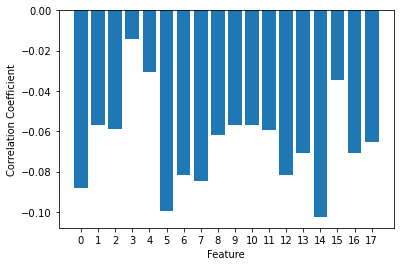

In [89]:
# plot the correlation coefficients
plt.bar(np.arange(18), corr_matrix)
plt.xticks(np.arange(18))
plt.xlabel('Feature')
plt.ylabel('Correlation Coefficient')
plt.show()

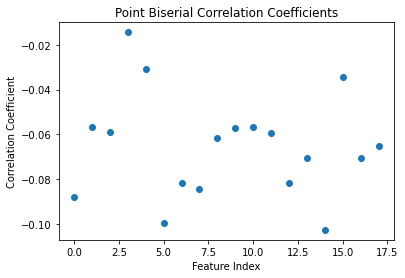

In [90]:
plt.scatter(range(len(corr_matrix)), corr_matrix)
plt.title('Point Biserial Correlation Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Correlation Coefficient')
plt.show()